## MSE 546 Project: Exploratory Data Analysis

We can start our Exploratory Data Analysis by importing some important libraries:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Category Key File

Lets first look at the "category_key.csv" file that contains the different labels for our images and the super categories they are under. We can start by reading in the CSV file and looking at the data

In [8]:
category_key_df = pd.read_csv('./kaggle_files/category_key.csv')

In [9]:
category_key_df.rename(columns={'name': 'category', 'supercat': 'super_category'}, inplace=True)

In [10]:
category_key_df.head(10)

,id,category,super_category
0,1,Actiniaria,Anemone
1,2,Actinernus,Anemone
2,3,Actiniidae,Anemone
3,4,Actinoscyphia,Anemone
4,5,Bolocera,Anemone
5,6,Dofleinia,Anemone
6,7,Hormathiidae,Anemone
7,8,Isosicyonis,Anemone
8,9,Liponema brevicorne,Anemone
9,10,Metridium farcimen,Anemone


In [11]:
category_key_df.dtypes

id                 int64
category          object
super_category    object
dtype: object

In [29]:
category_key_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              290 non-null    int64 
 1   category        290 non-null    object
 2   super_category  290 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.9+ KB


In [12]:
category_key_df.shape

(290, 3)

From this info on the category key data, we can see that the:
1. Our data does not have nulls
2. we have **290** disctinct animal categories!
3. we have 1 integer column and 2 object type columns

The columns of this data are:
- id: the unique integer ID of the animal category
- category: the name of the animal category (which is a 1 to 1 relationship with the integer ID)
- super_category: the name of the super category, which is an overarching class that contains many of the previous categories underneath it (1 to many relationship with the category column).

Lets explore how many categories are under each super category:

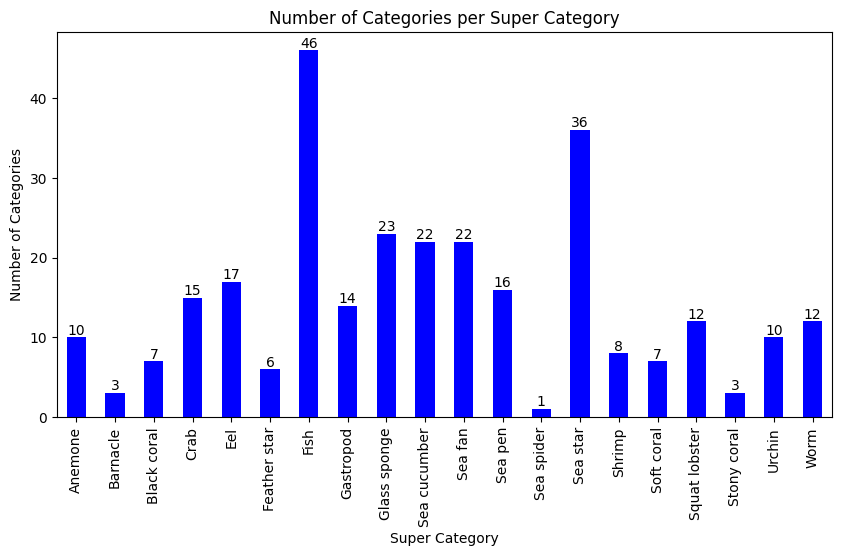

In [13]:
# group by each super category, number of unique categories in each
category_counts = category_key_df.groupby("super_category")["category"].nunique()

# Create axis
ax = category_counts.plot(kind="bar", figsize=(10, 5), color="blue")
ax.bar_label(ax.containers[0])

# add things to plot
plt.xlabel("Super Category")
plt.ylabel("Number of Categories")
plt.title("Number of Categories per Super Category")
plt.show()

Here we can see the number of categories in each super category. As we can see, there is not a balanced number of categories per super category. For example, there is only 1 category of animal underneath the super category "Sea Spider". However, there are 46 categories of animals under the super category "Fish".

Lets look at the categories under a specific super category:

In [14]:
category_key_df.loc[category_key_df['super_category'] == "Eel"]

,id,category,super_category
56,57,Anguilliformes,Eel
57,58,Nettastoma parviceps,Eel
58,59,Ophichthus frontalis,Eel
59,60,Synaphobranchidae,Eel
60,61,Eptatretus,Eel
61,62,Bothrocara brunneum,Eel
62,63,Eucryphycus californicus,Eel
63,64,Lycenchelys,Eel
64,65,Lycenchelys crotalinus,Eel
65,66,Lycodapus,Eel


We can see here as an example, here are the 17 different categories of animals underneath the super category "Eel"

### Multi-Label Classification Data

For our project, we are going to take an image from the dataset of underwater images, and classify what animal categories are present in the image. Each image has a unique ID, which is its file name. In order to train our model on these images, we have a dataset showing the correct animal categories (or "labels") that are present in each image. Lets take a look at this data:

In [15]:
classification_df = pd.read_csv('./kaggle_files/multilabel_classification/train.csv')

In [16]:
classification_df.head(10)

,id,categories
0,3b6f01ae-5bde-434d-9b06-79b269421ed6,[1.0]
1,dce21f7c-20e5-482b-bd90-c038f8464c03,[1.0]
2,4a7f2199-772d-486d-b8e2-b651246316b5,[1.0]
3,3bddedf6-4ff8-4e81-876a-564d2b03b364,"[1.0, 9.0, 11.0, 88.0]"
4,3f735021-f5de-4168-b139-74bf2859d12a,"[1.0, 37.0, 51.0, 119.0]"
5,130e185f-09c5-490c-8d08-641c4cbf6e54,"[1.0, 51.0, 119.0]"
6,2eb29244-2d98-42d8-a464-482b390513cc,"[1.0, 88.0, 119.0]"
7,77959db0-6a8c-475d-9380-60b649ce9359,"[1.0, 51.0, 119.0, 160.0]"
8,07629244-7227-4b94-a58a-01fee7b1092a,"[1.0, 214.0]"
9,aeb5813f-fa20-4aa1-9eab-56c508b8f53e,"[1.0, 224.0]"


In [17]:
classification_df.dtypes

id            object
categories    object
dtype: object

In [30]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5950 entries, 0 to 5949
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5950 non-null   object
 1   categories  5950 non-null   object
dtypes: object(2)
memory usage: 93.1+ KB


In [18]:
classification_df.shape

(5950, 2)

From this info on the multi-label classification data, we can see that the:
1. Our data does not have nulls
2. Each row in the training data set corresponds to an underwater image. The training data for multi label classification has **5950** total images!
3. we have 2 object type columns

The columns of this data are:
- id: the ID of the image (that corresponds to the image file name)
- categories: the animal category ID's that are present in each image (this corresponds to the category_key.csv file we explored earlier in the notebook, to see what the string name of each category ID and the super category it is under)


Lets explore how this data is distruibuted across the different categories. First, we need to do some data preprocessing:

In [19]:
type(classification_df.iloc[5,1])

str

In [20]:
# convert string to list data type
classification_df["categories"] = classification_df["categories"].apply(lambda x: [int(float(s)) for s in x.replace("[", "").replace("]", "").split(',')])

In [21]:
type(classification_df.iloc[5,1])

list

In [22]:
classification_df.iloc[5,1]

[1, 51, 119]

In [23]:
exp_classification_df = classification_df.explode(['categories'])
exp_classification_df.rename(columns={'categories': 'category'}, inplace=True)
exp_classification_df.head(10)

,id,category
0,3b6f01ae-5bde-434d-9b06-79b269421ed6,1
1,dce21f7c-20e5-482b-bd90-c038f8464c03,1
2,4a7f2199-772d-486d-b8e2-b651246316b5,1
3,3bddedf6-4ff8-4e81-876a-564d2b03b364,1
3,3bddedf6-4ff8-4e81-876a-564d2b03b364,9
3,3bddedf6-4ff8-4e81-876a-564d2b03b364,11
3,3bddedf6-4ff8-4e81-876a-564d2b03b364,88
4,3f735021-f5de-4168-b139-74bf2859d12a,1
4,3f735021-f5de-4168-b139-74bf2859d12a,37
4,3f735021-f5de-4168-b139-74bf2859d12a,51


In [24]:
merged_df = exp_classification_df.merge(category_key_df, left_on='category', right_on='id', how='right')

merged_df.head(10)

,id_x,category_x,id_y,category_y,super_category
0,3b6f01ae-5bde-434d-9b06-79b269421ed6,1,1,Actiniaria,Anemone
1,dce21f7c-20e5-482b-bd90-c038f8464c03,1,1,Actiniaria,Anemone
2,4a7f2199-772d-486d-b8e2-b651246316b5,1,1,Actiniaria,Anemone
3,3bddedf6-4ff8-4e81-876a-564d2b03b364,1,1,Actiniaria,Anemone
4,3f735021-f5de-4168-b139-74bf2859d12a,1,1,Actiniaria,Anemone
5,130e185f-09c5-490c-8d08-641c4cbf6e54,1,1,Actiniaria,Anemone
6,2eb29244-2d98-42d8-a464-482b390513cc,1,1,Actiniaria,Anemone
7,77959db0-6a8c-475d-9380-60b649ce9359,1,1,Actiniaria,Anemone
8,07629244-7227-4b94-a58a-01fee7b1092a,1,1,Actiniaria,Anemone
9,aeb5813f-fa20-4aa1-9eab-56c508b8f53e,1,1,Actiniaria,Anemone


Now lets look at the super categories distribution across the dataset:

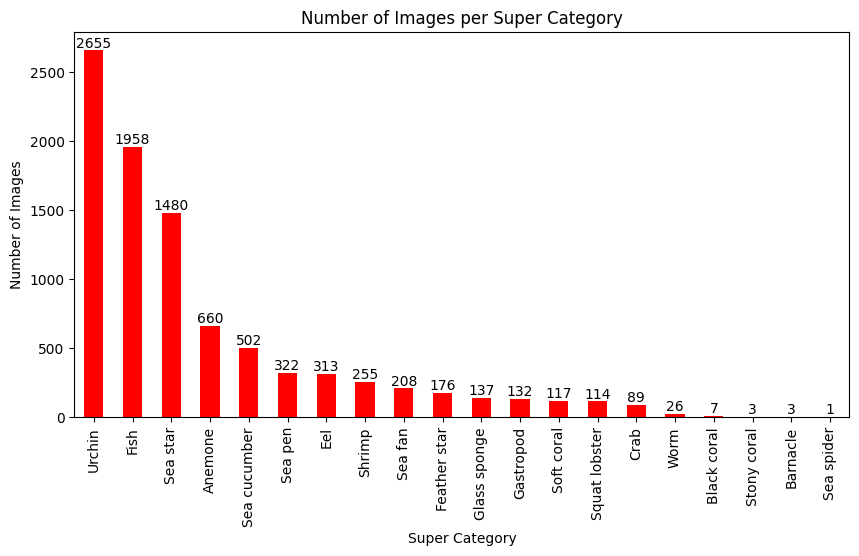

In [25]:
# Count how many images are in each super category
super_category_counts = merged_df["super_category"].value_counts()

# make axis
ax = super_category_counts.plot(kind="bar", figsize=(10, 5), color="red")
ax.bar_label(ax.containers[0])

# Add stuff to graph like labels
plt.xlabel("Super Category")
plt.ylabel("Number of Images")
plt.title("Number of Images per Super Category")

plt.show()


As we can see, the highest amount of super categories that are in the dataset are: "*Urchins*", "*Fish*", and "*Sea Star*". This chart also shows that the dataset is quite imbalanced, as these top 3 super categories are in much more images then the less common super categories. For example, there is only 1 image that contains the "*Sea spider*"

Now lets look at the underlying categories distribution:

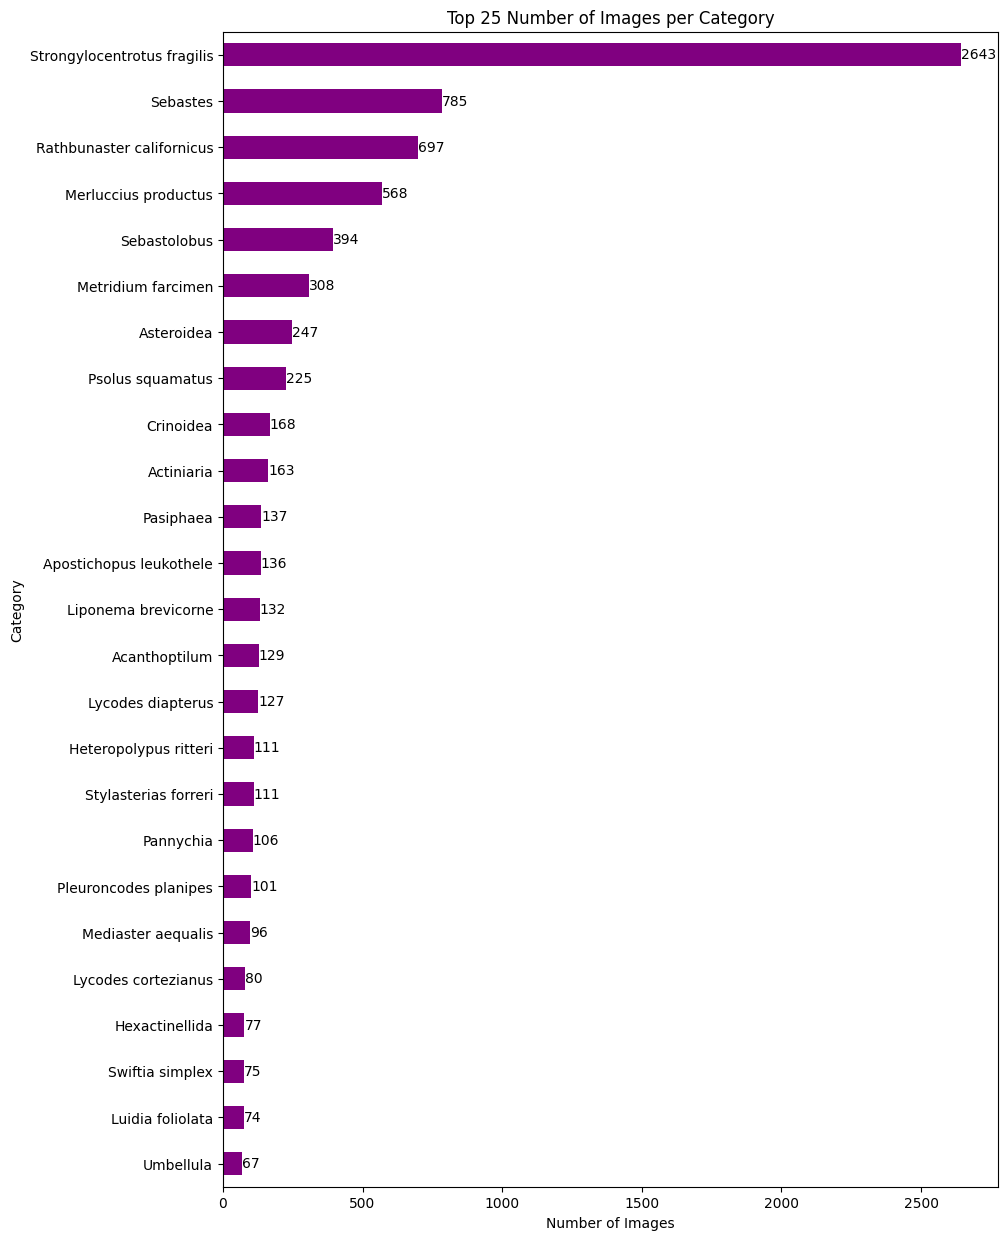

In [26]:
# Show only the top 20 categories
# top_n = 20  # Change this as needed
category_counts = merged_df["category_y"].value_counts().head(25)


plt.figure(figsize=(10, 15))
ax = category_counts.sort_values().plot(kind="barh", color="purple")
ax.bar_label(ax.containers[0]) # numbers on bars

plt.xlabel("Number of Images")
plt.ylabel("Category")
plt.title("Top 25 Number of Images per Category")

plt.show()

Since there are alot of categories (290), lets just look at the top 25 highest occuring categories. As we can see, the dataset is very imbalanced, showing that majority of the animal categories present in the training images are the "*Strongylocentrotus fragilis*" with a whopping 2643 images that they appear in. The animal category image count decreases quite steeply, with the "*Umbellula*" having the 25th highest appearances and only being at 67